In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

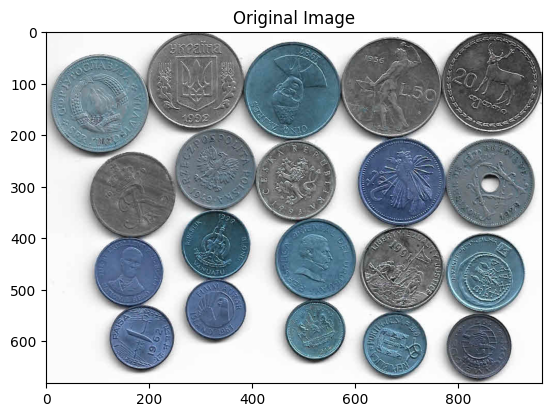

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 None)

In [55]:
coin = cv2.imread("media/coins.jpg")
plt.figure(), plt.imshow(coin), plt.title("Original Image"), plt.show()

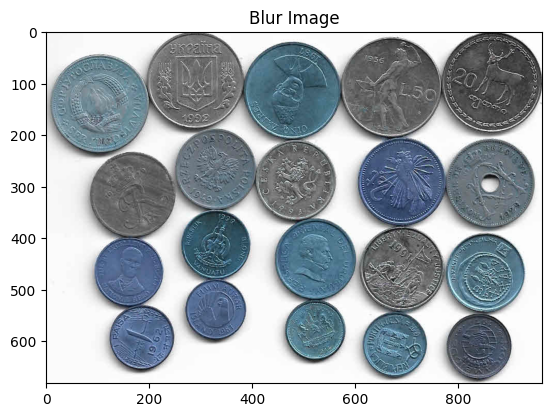

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Blur Image'),
 None)

In [56]:
coin_blur = cv2.medianBlur(coin,13)
plt.figure(), plt.imshow(coin), plt.title("Blur Image"), plt.show()

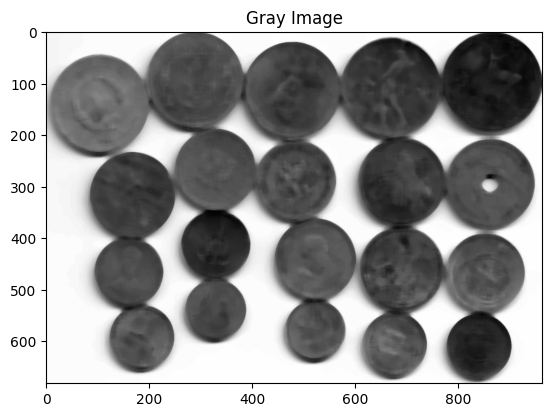

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Gray Image'),
 None)

In [57]:
#gray scale
coin_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray,cmap="gray"), plt.title("Gray Image"), plt.show()

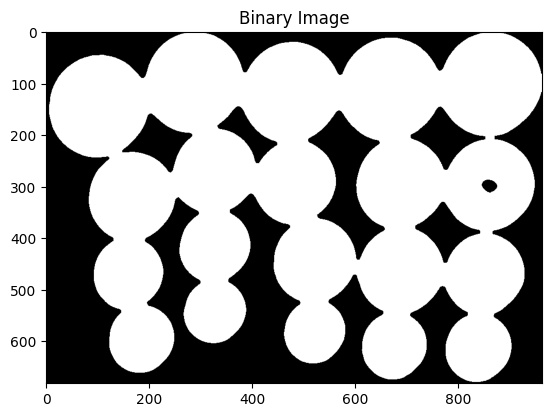

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Binary Image'),
 None)

In [67]:
#binary threshold
_,coin_thresh = cv2.threshold(coin_gray,170,255,cv2.THRESH_BINARY_INV)
plt.figure(), plt.imshow(coin_thresh,cmap="gray"), plt.title("Binary Image"), plt.show()

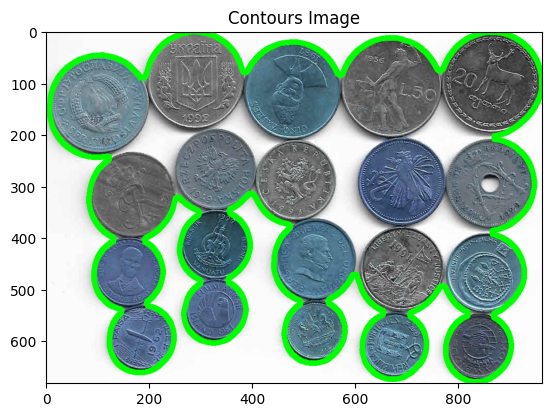

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Contours Image'),
 None)

In [68]:
#kontur

contours,hirerarchy = cv2.findContours(coin_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hirerarchy[0][i][3]==-1:
        #external contour
        cv2.drawContours(coin,contours,i,(0,255,0),10)
plt.figure(), plt.imshow(coin), plt.title("Contours Image"), plt.show()



# WATERSHED

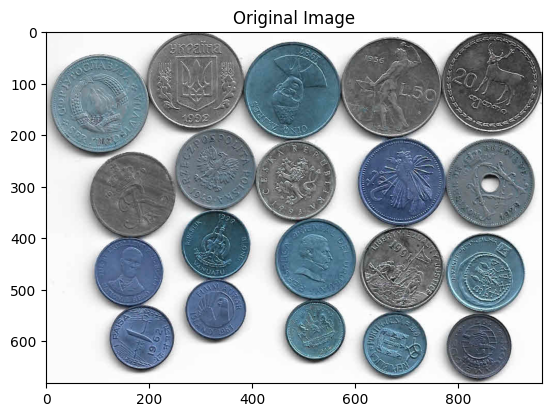

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 None)

In [69]:
coin = cv2.imread("media/coins.jpg")
plt.figure(), plt.imshow(coin), plt.title("Original Image"), plt.show()

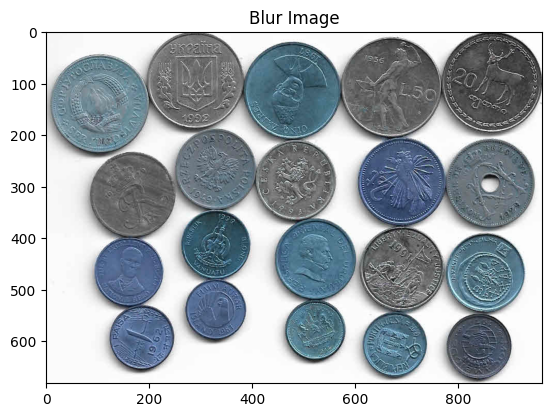

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Blur Image'),
 None)

In [70]:
coin_blur = cv2.medianBlur(coin,13)
plt.figure(), plt.imshow(coin), plt.title("Blur Image"), plt.show()

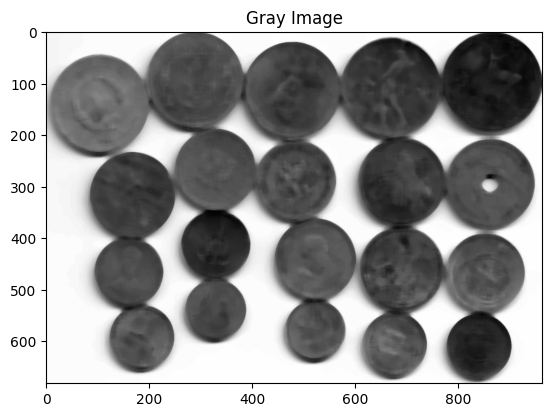

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Gray Image'),
 None)

In [71]:
#gray scale
coin_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray,cmap="gray"), plt.title("Gray Image"), plt.show()

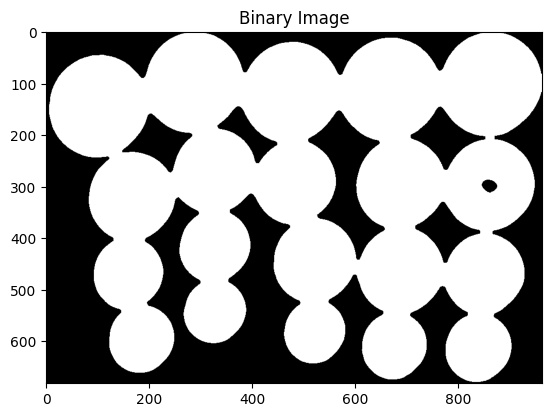

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Binary Image'),
 None)

In [88]:
#binary threshold
_,coin_thresh = cv2.threshold(coin_gray,170,255,cv2.THRESH_BINARY_INV)
plt.figure(), plt.imshow(coin_thresh,cmap="gray"), plt.title("Binary Image"), plt.show()

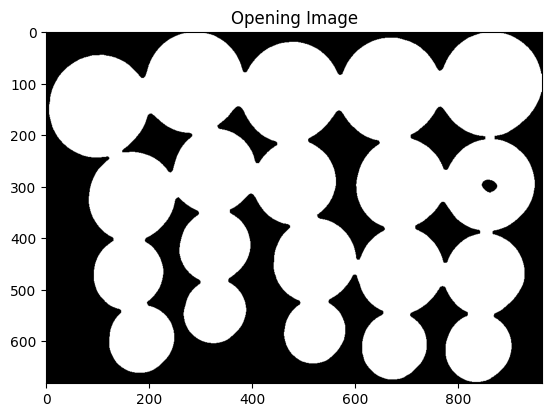

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Opening Image'),
 None)

In [89]:
#acilma
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(coin_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
plt.figure(), plt.imshow(opening,cmap="gray"), plt.title("Opening Image"), plt.show()


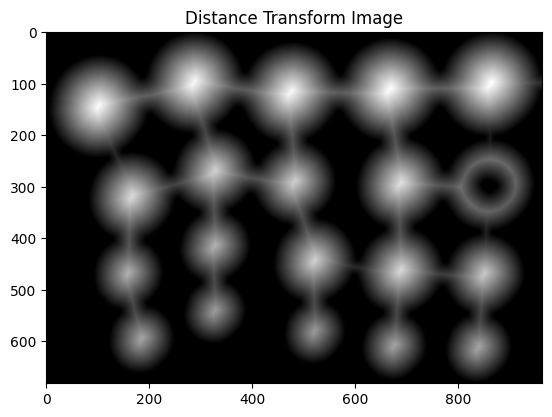

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Distance Transform Image'),
 None)

In [90]:
#nesneler arasi distance bulalim

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.figure(), plt.imshow(dist_transform,cmap="gray"), plt.title("Distance Transform Image"), plt.show()

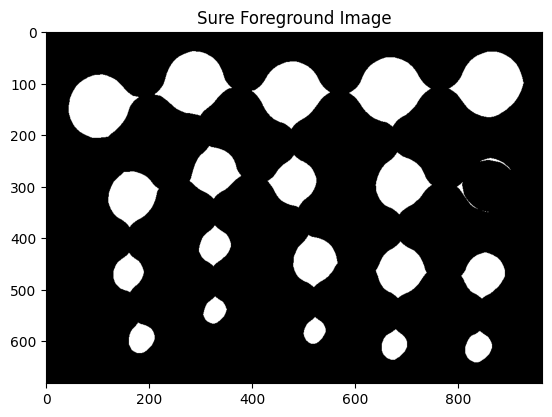

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Sure Foreground Image'),
 None)

In [91]:
#resmi kucultelim
ret, sure_foreground = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
plt.figure(), plt.imshow(sure_foreground,cmap="gray"), plt.title("Sure Foreground Image"), plt.show()

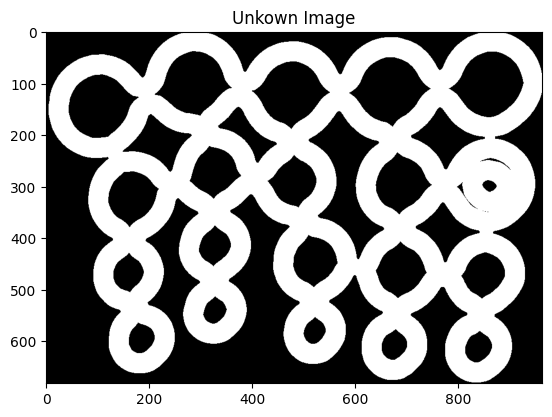

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Unkown Image'),
 None)

In [92]:
#arka plan icin resmi buyutelim (dilate:genisletme)
sure_bakground = cv2.dilate(opening,kernel,iterations=1)

sure_foreground = np.uint8(sure_foreground)

unkown = cv2.subtract(sure_bakground,sure_foreground) #arka plan la on planin farkini alirsak daha net fotograf elde ederiz
plt.figure(), plt.imshow(unkown,cmap="gray"), plt.title("Unkown Image"), plt.show()


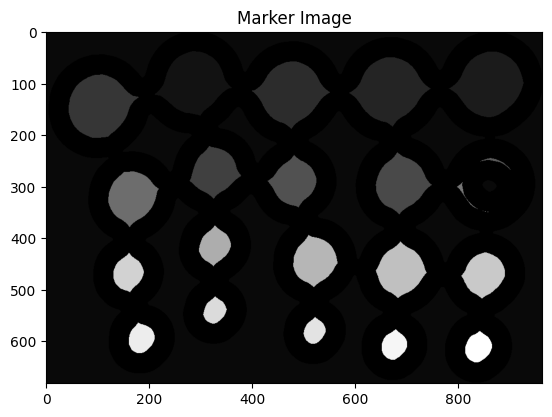

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Marker Image'),
 None)

In [93]:
#baglanti yapalim
ret ,marker = cv2.connectedComponents(sure_foreground) #sure foreground icin baglanti yapalim
marker = marker + 1 #sure foreground 1 den basladigi icin 1 ekliyoruz
marker[unkown==255]=0 #resmin ortadaki degerleri 0 yapar
plt.figure(), plt.imshow(marker,cmap="gray"), plt.title("Marker Image"), plt.show()

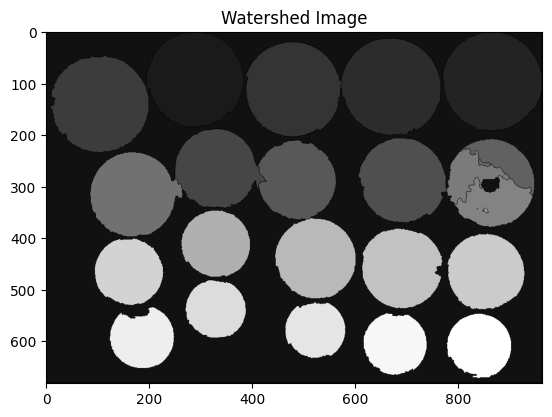

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Watershed Image'),
 None)

In [94]:
#havza  (watershed algoritmasi)
marker = cv2.watershed(coin,marker)
plt.figure(), plt.imshow(marker,cmap="gray"), plt.title("Watershed Image"), plt.show() #havza bolgelerini ayirt eder

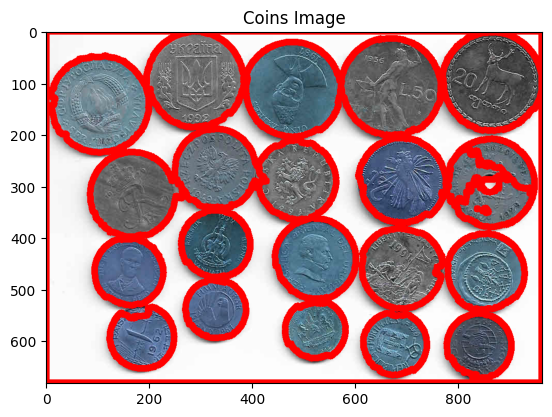

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Coins Image'),
 None)

In [95]:
#kontur

contours,hirerarchy = cv2.findContours(marker.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hirerarchy[0][i][3]==-1:
        #external contour
        cv2.drawContours(coin,contours,i,(255,0,0),10)
plt.figure(), plt.imshow(coin), plt.title("Coins Image"), plt.show()

